# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

3

: 

['Myanmar', 'Dominica']

,
 

4

: 

[

'Tanzania'

, 

'Antigua and Barbuda'

, 

'Fiji'

, 

'Seychelles'

,
     

'Papua New Guinea'

, 

'Tunisia'

, 

'Belize'

]

,
 

5

: 

[

'Trinidad and Tobago'

, 

'Grenada'

, 

'Jordan'

, 

'Brunei'

, 

'Uganda'

,
     

'Mauritius'

, 

'Libya'

]

,
 

6

: 

[

'Namibia'

, 

'Yemen'

, 

'Gambia'

, 

'Equatorial Guinea'

,
     

'Central African Republic'

, 

'Lebanon'

, 

'Paraguay'

, 

'Bahamas'

, 

'Kosovo'

,
     

'Lesotho'

, 

'Ireland'

, 

'Kyrgyzstan'

, 

'Jamaica'

, 

'Sao Tome and Principe'

,
     

'Netherlands'

, 

'Monaco'

, 

'Cambodia'

, 

'Guyana'

]

,
 

7

: 

[

'New Zealand'

, 

'Saint Vincent and the Grenadines'

, 

'Rwanda'

, 

'Thailand'

,
     

'Bhutan'

, 

'Mongolia'

, 

'Comoros'

, 

'Colombia'

, 

'Eritrea'

, 

'Zambia'

,
     

'Burundi'

, 

'Vietnam'

, 

'Venezuela'

, 

'Iceland'

, 

'Botswana'

, 

'Syria'

,
     

'Montenegro'

, 

'San Marino'

, 

'Kenya'

, 

'Norway'

, 

'Slovakia'

, 

'Morocco'

,
     

'Malawi'

, 

'Ethiopia'

, 

'Madagascar'

, 

'Costa Rica'

, 

'Cyprus'

, 

'Barbados'

,
     

'Liechtenstein'

, 

'Malta'

, 

'Kazakhstan'

, 

'Croatia'

, 

'Spain'

, 

'Australia'

,
     

'Afghanistan'

, 

'Guinea-Bissau'

, 

'Zimbabwe'

]

,
 

8

: 

[

'Congo'

, 

'Niger'

, 

'Djibouti'

, 

'Sri Lanka'

, 

'Sudan'

, 

'Korea, South'

,
     

'India'

, 

'Taiwan'

, 

'Nicaragua'

, 

'Argentina'

, 

'Andorra'

, 

'Maldives'

,
     

'Angola'

, 

'Philippines'

, 

'Slovenia'

, 

'Czech Republic'

, 

'Israel'

,
     

'Palestine'

, 

'Mozambique'

, 

'Nepal'

, 

'Saint Lucia'

, 

'Ghana'

, 

'Japan'

,
     

'Greece'

, 

'South Sudan'

, 

'South Africa'

]

,
 

9

: 

[

'Belarus'

, 

'Romania'

, 

'Ukraine'

, 

'Germany'

, 

'Gabon'

, 

'Austria'

, 

'Benin'

,
     

'Chad'

, 

'Tajikistan'

, 

'Ecuador'

, 

'Georgia'

, 

'Pakistan'

, 

'Cape Verde'

,
     

'Albania'

, 

'Singapore'

, 

'Bermuda'

, 

'Azerbaijan'

, 

'Suriname'

, 

'Iraq'

,
     

'China'

, 

'Luxembourg'

, 

'Somalia'

, 

'Finland'

, 

'Cameroon'

, 

'El Salvador'

,
     

'Mauritania'

, 

'Liberia'

, 

'Swaziland'

, 

'Uruguay'

, 

'Honduras'

, 

'Haiti'

,
     

'Qatar'

, 

'Oman'

, 

'Guatemala'

, 

'Mali'

, 

'Bosnia and Herzegovina'

]

,
 

10

: 

[

'Togo'

, 

'Bangladesh'

, 

'Malaysia'

, 

'Canada'

, 

'Moldova'

, 

'Chile'

, 

'Belgium'

,
      

'Lithuania'

, 

'Poland'

, 

'Serbia'

, 

'Hungary'

, 

'Saudi Arabia'

, 

'Switzerland'

,
      

'Panama'

, 

'Uzbekistan'

, 

'Sierra Leone'

, 

'Cuba'

, 

'Algeria'

, 

'Senegal'

,
      

'Indonesia'

, 

'Denmark'

]

,
 

11

: 

[

'Nigeria'

, 

'Peru'

, 

'Bolivia'

, 

'Bulgaria'

, 

'Latvia'

, 

'Macedonia'

, 

'Kuwait'

,
      

'Burkina Faso'

, 

'Armenia'

, 

'Guinea'

, 

'Egypt'

, 

'Mexico'

, 

'Turkey'

,
      

'Estonia'

, 

'Dominican Republic'

]

,
 

12

: 

[

'Brazil'

, 

'Italy'

, 

'Portugal'

, 

'France'

, 

'United States'

,
      

'United Arab Emirates'

, 

'Iran'

, 

'Bahrain'

]

,
 

13

: 

['Russia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

9

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

12

: 

[

'Brazil'

, 

'Italy'

, 

'Portugal'

, 

'France'

, 

'United States'

,
      

'United Arab Emirates'

, 

'Iran'

, 

'Bahrain'

]

,
 

13

: 

['Russia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  16May2020   330457362
        2nd    Past  17May2020  26May2020   330457362
        3rd    Past  27May2020  04Jun2020   330457362
        4th    Past  05Jun2020  13Jun2020   330457362
        5th    Past  14Jun2020  23Jun2020   330457362
        6th    Past  24Jun2020  04Jul2020   330457362
        7th    Past  05Jul2020  17Jul2020   330457362
        8th    Past  18Jul2020  31Jul2020   330457362
        9th    Past  01Aug2020  14Aug2020   330457362
        10th   Past  15Aug2020  29Aug2020   330457362
        11th   Past  30Aug2020  12Sep2020   330457362
        12th   Past  13Sep2020  26Sep2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	BRA,  7th phase (06Aug2020 - 13Aug2020): finished  477 trials in 0 min 10 sec

	USA, 10th phase (29Aug2020 - 11Sep2020): finished  861 trials in 0 min 20 sec

	ARE,  7th phase (21Jul2020 - 15Aug2020): finished 1022 trials in 0 min 25 sec

	ARE,  2nd phase (15May2020 - 24May2020): finished 1993 trials in 1 min  0 sec

	PRT,  3rd phase (02Jun2020 - 13Jun2020): finished 1979 trials in 1 min  0 sec

	BRA,  1st phase (27May2020 - 13Jun2020): finished 1976 trials in 1 min  0 sec

	BHR,  0th phase (06Mar2020 - 09May2020): finished 1916 trials in 1 min  0 sec

	ARE,  1st phase (27Apr2020 - 14May2020): finished 1961 trials in 1 min  0 sec

	ITA,  2nd phase (29Mar2020 - 08Apr2020): finished 1982 trials in 1 min  0 sec

	BRA,  0th phase (16Mar2020 - 26May2020): finished 1923 trials in 1 min  0 sec

	BRA, 11th phase (14Sep2020 - 26Sep2020): finished 1972 trials in 1 min  0 sec

	ARE,  5th phase (20Jun2020 - 03Jul2020): finished 1007 trials in 0 min 25 sec

	BRA,  6th phase (29Jul2020 - 05Aug2020): finished 1340 trials in 0 min 35 sec

	PRT, 10th phase (08Sep2020 - 16Sep2020): finished 1975 trials in 1 min  0 sec

	ARE,  0th phase (12Feb2020 - 26Apr2020): finished 1914 trials in 1 min  0 sec

	RUS,  5th phase (14Jun2020 - 23Jun2020): finished 1963 trials in 1 min  0 sec

	RUS,  2nd phase (17May2020 - 26May2020): finished 1962 trials in 1 min  0 sec

	RUS,  6th phase (24Jun2020 - 04Jul2020): finished 1977 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 16May2020): finished 1983 trials in 1 min  0 sec

	BRA, 10th phase (02Sep2020 - 13Sep2020): finished 1982 trials in 1 min  0 sec

	FRA,  5th phase (05May2020 - 26May2020): finished 1965 trials in 1 min  0 sec

	PRT,  7th phase (21Jul2020 - 07Aug2020): finished 1954 trials in 1 min  0 sec

	ITA,  9th phase (31Jul2020 - 28Aug2020): finished 1955 trials in 1 min  0 sec

	USA,  2nd phase (12May2020 - 05Jun2020): finished 1948 trials in 1 min  0 sec

	ITA,  5th phase (01May2020 - 09May2020): finished  669 trials in 0 min 15 sec

	PRT,  0th phase (14Mar2020 - 27Apr2020): finished 1914 trials in 1 min  0 sec

	USA, 11th phase (12Sep2020 - 26Sep2020): finished  834 trials in 0 min 20 sec

	BHR,  3rd phase (14Jun2020 - 24Jun2020): finished 1968 trials in 1 min  0 sec

	USA,  7th phase (28Jul2020 - 06Aug2020): finished  463 trials in 0 min 10 sec

	FRA,  3rd phase (13Apr2020 - 20Apr2020): finished 1966 trials in 1 min  0 sec

	IRN,  3rd phase (14May2020 - 31May2020): finished  455 trials in 0 min 10 sec

	BHR,  7th phase (27Jul2020 - 09Aug2020): finished  990 trials in 0 min 25 sec

	IRN,  7th phase (14Jul2020 - 27Jul2020): finished  240 trials in 0 min  5 sec

	BHR,  5th phase (06Jul2020 - 14Jul2020): finished 1931 trials in 1 min  0 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished 1918 trials in 1 min  0 sec

	RUS, 12th phase (13Sep2020 - 26Sep2020): finished  797 trials in 0 min 20 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1925 trials in 1 min  0 sec

	BRA,  8th phase (14Aug2020 - 24Aug2020): finished 1905 trials in 1 min  0 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1893 trials in 1 min  0 sec

	FRA,  4th phase (21Apr2020 - 04May2020): finished 1905 trials in 1 min  0 sec

	PRT,  5th phase (26Jun2020 - 07Jul2020): finished 1894 trials in 1 min  0 sec

	RUS, 11th phase (30Aug2020 - 12Sep2020): finished 1260 trials in 0 min 35 sec

	USA,  6th phase (18Jul2020 - 27Jul2020): finished  444 trials in 0 min 10 sec

	FRA,  6th phase (27May2020 - 25Jun2020): finished 1870 trials in 1 min  0 sec

	BRA,  5th phase (21Jul2020 - 28Jul2020): finished 1884 trials in 1 min  0 sec

	FRA,  8th phase (23Jul2020 - 10Aug2020): finished  418 trials in 0 min 10 sec

	ITA, 11th phase (15Sep2020 - 26Sep2020): finished  236 trials in 0 min  5 sec

	ITA,  3rd phase (09Apr2020 - 18Apr2020): finished  239 trials in 0 min  5 sec

	FRA,  9th phase (11Aug2020 - 27Aug2020): finished  783 trials in 0 min 20 sec

	RUS,  9th phase (01Aug2020 - 14Aug2020): finished 1876 trials in 1 min  0 sec

	ARE,  9th phase (02Sep2020 - 09Sep2020): finished 1890 trials in 1 min  0 sec

	PRT,  4th phase (14Jun2020 - 25Jun2020): finished 1892 trials in 1 min  0 sec

	PRT, 11th phase (17Sep2020 - 26Sep2020): finished 1876 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1872 trials in 1 min  0 sec

	ITA,  6th phase (10May2020 - 21May2020): finished  445 trials in 0 min 10 sec

	PRT,  8th phase (08Aug2020 - 25Aug2020): finished 1860 trials in 1 min  0 sec

	USA,  1st phase (19Apr2020 - 11May2020): finished 1842 trials in 1 min  0 sec

	IRN, 10th phase (28Aug2020 - 13Sep2020): finished 1866 trials in 1 min  0 sec

	BRA,  9th phase (25Aug2020 - 01Sep2020): finished  444 trials in 0 min 10 sec

	FRA,  0th phase (12Feb2020 - 23Mar2020): finished 1824 trials in 1 min  0 sec

	IRN,  9th phase (12Aug2020 - 27Aug2020): finished  622 trials in 0 min 15 sec

	BHR,  9th phase (23Aug2020 - 05Sep2020): finished 1862 trials in 1 min  0 sec

	ITA,  4th phase (19Apr2020 - 30Apr2020): finished 1865 trials in 1 min  0 sec

	PRT,  6th phase (08Jul2020 - 20Jul2020): finished 1855 trials in 1 min  0 sec

	ARE, 10th phase (10Sep2020 - 17Sep2020): finished 1864 trials in 1 min  0 sec

	FRA, 11th phase (11Sep2020 - 26Sep2020): finished 1854 trials in 1 min  0 sec

	IRN,  4th phase (01Jun2020 - 15Jun2020): finished 1845 trials in 1 min  0 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1847 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 18Apr2020): finished 1797 trials in 1 min  0 sec

	USA,  9th phase (18Aug2020 - 28Aug2020): finished  234 trials in 0 min  5 sec

	RUS,  4th phase (05Jun2020 - 13Jun2020): finished 1860 trials in 1 min  0 sec

	ARE,  3rd phase (25May2020 - 05Jun2020): finished 1866 trials in 1 min  0 sec

	PRT,  1st phase (28Apr2020 - 17May2020): finished 1864 trials in 1 min  0 sec

	FRA,  1st phase (24Mar2020 - 02Apr2020): finished 1874 trials in 1 min  0 sec

	ARE, 11th phase (18Sep2020 - 26Sep2020): finished  963 trials in 0 min 25 sec

	ARE,  4th phase (06Jun2020 - 19Jun2020): finished  957 trials in 0 min 25 sec

	BHR,  6th phase (15Jul2020 - 26Jul2020): finished  417 trials in 0 min 10 sec

	BHR,  8th phase (10Aug2020 - 22Aug2020): finished  235 trials in 0 min  5 sec

	USA,  4th phase (25Jun2020 - 07Jul2020): finished 1858 trials in 1 min  0 sec

	FRA, 10th phase (28Aug2020 - 10Sep2020): finished  799 trials in 0 min 20 sec

	BHR,  1st phase (10May2020 - 31May2020): finished 1852 trials in 1 min  0 sec

	IRN,  6th phase (30Jun2020 - 13Jul2020): finished  234 trials in 0 min  5 sec

	ARE,  8th phase (16Aug2020 - 01Sep2020): finished  626 trials in 0 min 15 sec

	ITA,  7th phase (22May2020 - 13Jun2020): finished  617 trials in 0 min 15 sec

	RUS,  7th phase (05Jul2020 - 17Jul2020): finished 1860 trials in 1 min  0 sec

	IRN,  8th phase (28Jul2020 - 11Aug2020): finished  624 trials in 0 min 15 sec

	IRN,  5th phase (16Jun2020 - 29Jun2020): finished 1865 trials in 1 min  0 sec

	ITA, 10th phase (29Aug2020 - 14Sep2020): finished  231 trials in 0 min  5 sec

	BHR,  4th phase (25Jun2020 - 05Jul2020): finished  796 trials in 0 min 20 sec

	FRA,  7th phase (26Jun2020 - 22Jul2020): finished  426 trials in 0 min 10 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1885 trials in 1 min  0 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1843 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 01Jun2020): finished 1844 trials in 1 min  0 sec

	ARE,  6th phase (04Jul2020 - 20Jul2020): finished 1841 trials in 1 min  0 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1852 trials in 1 min  0 sec

	BRA,  4th phase (09Jul2020 - 20Jul2020): finished  435 trials in 0 min 10 sec

	ITA,  8th phase (14Jun2020 - 30Jul2020): finished  598 trials in 0 min 15 sec

	BHR, 10th phase (06Sep2020 - 15Sep2020): finished 1842 trials in 1 min  0 sec

	USA,  5th phase (08Jul2020 - 17Jul2020): finished  442 trials in 0 min 10 sec

	IRN,  2nd phase (18Apr2020 - 13May2020): finished  243 trials in 0 min  5 sec

	RUS,  3rd phase (27May2020 - 04Jun2020): finished 2010 trials in 1 min  0 sec

	RUS, 10th phase (15Aug2020 - 29Aug2020): finished 2013 trials in 1 min  0 sec

	USA,  8th phase (07Aug2020 - 17Aug2020): finished 1058 trials in 0 min 25 sec

	USA,  3rd phase (06Jun2020 - 24Jun2020): finished 2038 trials in 1 min  0 sec

	RUS,  8th phase (18Jul2020 - 31Jul2020): finished 2055 trials in 1 min  0 sec

	PRT,  9th phase (26Aug2020 - 07Sep2020): finished 2055 trials in 1 min  0 sec

	BRA,  2nd phase (14Jun2020 - 26Jun2020): finished 1229 trials in 0 min 30 sec

	BHR, 11th phase (16Sep2020 - 26Sep2020): finished 2123 trials in 1 min  0 sec

Completed optimization. Total: 21 min 56 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02  0.602763   
        1st    Past  07May2020  16May2020   330457362  SIR-F  2.51  0.000729   
        2nd    Past  17May2020  26May2020   330457362  SIR-F  1.56  0.000494   
        3rd    Past  27May2020  04Jun2020   330457362  SIR-F  1.03  0.000708   
        4th    Past  05Jun2020  13Jun2020   330457362  SIR-F  1.25  0.000825   
        5th    Past  14Jun2020  23Jun2020   330457362  SIR-F  0.82  0.000348   
        6th    Past  24Jun2020  04Jul2020   330457362  SIR-F  0.94  0.018868   
        7th    Past  05Jul2020  17Jul2020   330457362  SIR-F  0.72  0.000085   
        8th    Past  18Jul2020  31Jul2020   330457362  SIR-F  0.76  0.016778   
        9th    Past  01Aug2020  14Aug2020   330457362  SIR-F  0.76  0.001416   
        10th   Past  15Aug2020  29Aug2020   330457362  SIR-F  0.76  0.017979   
        11th   Past  30Aug2020  12Sep2020   330457362  SIR-F  0.88  0.017551   
        12th   Past  13Sep2020  26Sep2020   330457362  SIR-F  1.09  0.001329   

                  kappa       rho     sigma  tau  1/beta [day]  alpha1 [-]  \
Country Phase                                                                
Russia  0th    0.544883  0.034081  0.002299  360             7       0.603   
        1st    0.000120  0.012958  0.005045  360            19       0.001   
        2nd    0.000106  0.006988  0.004364  360            35       0.000   
        3rd    0.000117  0.005479  0.005196  360            45       0.001   
        4th    0.000085  0.004647  0.003623  360            53       0.001   
        5th    0.000079  0.003467  0.004138  360            72       0.000   
        6th    0.000011  0.002568  0.002671  360            97       0.019   
        7th    0.000060  0.002191  0.002979  360           114       0.000   
        8th    0.000010  0.001845  0.002373  360           135       0.017   
        9th    0.000031  0.001468  0.001889  360           170       0.001   
        10th   0.000003  0.001277  0.001655  360           195       0.018   
        11th   0.000011  0.001369  0.001513  360           182       0.018   
        12th   0.000025  0.001587  0.001430  360           157       0.001   

               1/gamma [day]  1/alpha2 [day]      RMSLE  Trials       Runtime  
Country Phase                                                                  
Russia  0th              108               0  18.966727    1925  1 min  0 sec  
        1st               49            2088   0.074230    1983  1 min  0 sec  
        2nd               57            2365   0.086689    1962  1 min  0 sec  
        3rd               48            2144   0.067224    2010  1 min  0 sec  
        4th               69            2957   0.048345    1860  1 min  0 sec  
        5th               60            3162   0.063847    1963  1 min  0 sec  
        6th               93           22612   0.050093    1977  1 min  0 sec  
        7th               83            4165   0.070243    1860  1 min  0 sec  
        8th              105           25378   0.060159    2055  1 min  0 sec  
        9th              132            7999   0.048987    1876  1 min  0 sec  
        10th             151           83179   0.030889    2013  1 min  0 sec  
        11th             165           22591   0.011780    1260  0 min 35 sec  
        12th             174           10006   0.008052     797  0 min 20 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33
1,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33
2,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33
3,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33
4,2020-02-12,Russia,0.602763,0.544883,0.0340813,0.00229851,0.603,0,7,108,...,0,0,0,0,0,3,0,1,0,8.33


### $Rt$: Reprodcution number $\mathrm{[-]}$

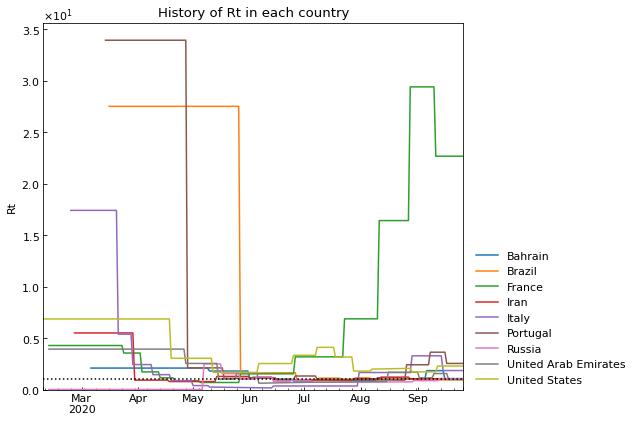

Country,Bahrain,Brazil,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,
2020-09-22,1.02,0.96,22.67,1.06,1.86,2.55,1.09,0.99,2.3
2020-09-23,1.02,0.96,22.67,1.06,1.86,2.55,1.09,0.99,2.3
2020-09-24,1.02,0.96,22.67,1.06,1.86,2.55,1.09,0.99,2.3
2020-09-25,1.02,0.96,22.67,1.06,1.86,2.55,1.09,0.99,2.3
2020-09-26,1.02,0.96,22.67,1.06,1.86,2.55,1.09,0.99,2.3


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

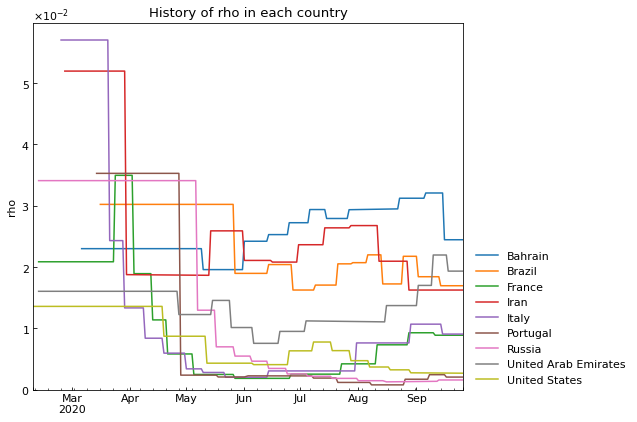

Country,Bahrain,Brazil,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,
2020-09-22,0.024446,0.016948,0.008879,0.016246,0.009068,0.002058,0.001587,0.01933,0.002689
2020-09-23,0.024446,0.016948,0.008879,0.016246,0.009068,0.002058,0.001587,0.01933,0.002689
2020-09-24,0.024446,0.016948,0.008879,0.016246,0.009068,0.002058,0.001587,0.01933,0.002689
2020-09-25,0.024446,0.016948,0.008879,0.016246,0.009068,0.002058,0.001587,0.01933,0.002689
2020-09-26,0.024446,0.016948,0.008879,0.016246,0.009068,0.002058,0.001587,0.01933,0.002689


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

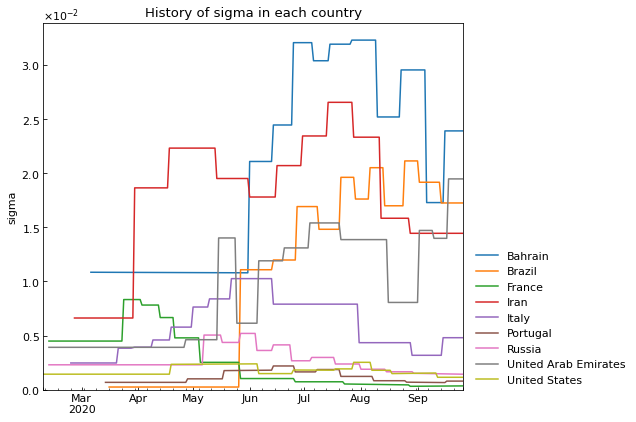

Country,Bahrain,Brazil,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,
2020-09-22,0.023894,0.017241,0.000351,0.01444,0.004801,0.000794,0.00143,0.019462,0.001147
2020-09-23,0.023894,0.017241,0.000351,0.01444,0.004801,0.000794,0.00143,0.019462,0.001147
2020-09-24,0.023894,0.017241,0.000351,0.01444,0.004801,0.000794,0.00143,0.019462,0.001147
2020-09-25,0.023894,0.017241,0.000351,0.01444,0.004801,0.000794,0.00143,0.019462,0.001147
2020-09-26,0.023894,0.017241,0.000351,0.01444,0.004801,0.000794,0.00143,0.019462,0.001147


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

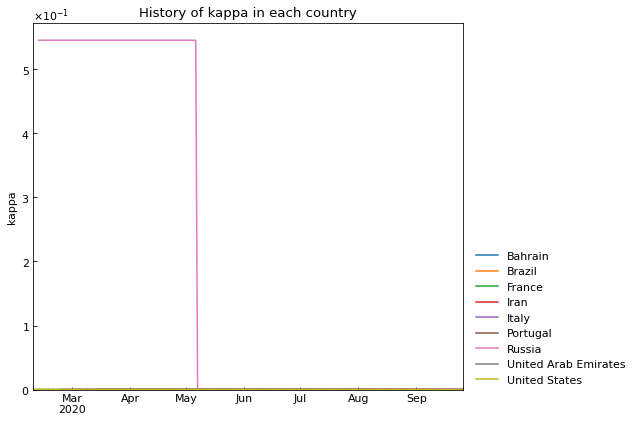

Country,Bahrain,Brazil,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,
2020-09-22,0.000064,0.000141,0.000041,0.000636,0.000079,0.00001,0.000025,0.000021,0.000002
2020-09-23,0.000064,0.000141,0.000041,0.000636,0.000079,0.00001,0.000025,0.000021,0.000002
2020-09-24,0.000064,0.000141,0.000041,0.000636,0.000079,0.00001,0.000025,0.000021,0.000002
2020-09-25,0.000064,0.000141,0.000041,0.000636,0.000079,0.00001,0.000025,0.000021,0.000002
2020-09-26,0.000064,0.000141,0.000041,0.000636,0.000079,0.00001,0.000025,0.000021,0.000002


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

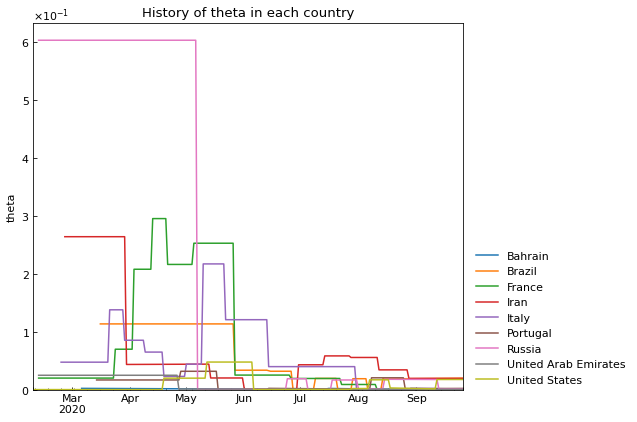

Country,Bahrain,Brazil,France,Iran,Italy,Portugal,Russia,United Arab Emirates,United States
Date,,,,,,,,,
2020-09-22,0.00022,0.019868,0.000019,0.019502,0.001204,0.002199,0.001329,0.000679,0.017601
2020-09-23,0.00022,0.019868,0.000019,0.019502,0.001204,0.002199,0.001329,0.000679,0.017601
2020-09-24,0.00022,0.019868,0.000019,0.019502,0.001204,0.002199,0.001329,0.000679,0.017601
2020-09-25,0.00022,0.019868,0.000019,0.019502,0.001204,0.002199,0.001329,0.000679,0.017601
2020-09-26,0.00022,0.019868,0.000019,0.019502,0.001204,0.002199,0.001329,0.000679,0.017601


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45519 entries, 0 to 45630
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 45519 non-null  datetime64[ns]
 1   Country                              45519 non-null  object        
 2   Rt                                   45519 non-null  float64       
 3   theta                                45519 non-null  float64       
 4   kappa                                45519 non-null  float64       
 5   rho                                  45519 non-null  float64       
 6   sigma                                45519 non-null  float64       
 7   School_closing                       45519 non-null  int64         
 8   Workplace_closing                    45519 non-null  int64         
 9   Cancel_events                        45519 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.267765,-0.250934,0.160161,-0.229443,-0.042179,0.064373,-0.024745,-0.027392,-0.151145,-0.213759,-0.142964,-0.170872,-0.006390,-0.074609,-0.159358,-0.082126
theta,-0.267765,1.000000,0.977002,0.760622,-0.034373,-0.197517,-0.115158,-0.289926,-0.287728,-0.265377,0.162046,-0.041204,0.203343,-0.336556,-0.371422,0.006486,-0.117347
kappa,-0.250934,0.977002,1.000000,0.767980,-0.095546,-0.228092,-0.157012,-0.311667,-0.288804,-0.270365,0.155535,-0.055888,0.223436,-0.359980,-0.315959,0.006213,-0.157997
rho,0.160161,0.760622,0.767980,1.000000,0.050690,-0.151769,-0.097947,-0.355133,-0.317461,-0.325879,0.092481,-0.135342,0.038513,-0.386676,-0.457336,-0.124770,-0.172074
sigma,-0.229443,-0.034373,-0.095546,0.050690,1.000000,0.205133,0.040196,0.058067,-0.136006,-0.049035,0.003151,-0.116633,-0.090252,0.079486,-0.126837,0.154993,0.079393
School_closing,-0.042179,-0.197517,-0.228092,-0.151769,0.205133,1.000000,0.733026,0.707388,0.655973,0.566339,0.558130,0.527089,0.429864,0.696957,0.491739,0.267734,0.807796
Workplace_closing,0.064373,-0.115158,-0.157012,-0.097947,0.040196,0.733026,1.000000,0.726142,0.771059,0.682014,0.668853,0.648680,0.481247,0.786193,0.489723,0.332263,0.894898
Cancel_events,-0.024745,-0.289926,-0.311667,-0.355133,0.058067,0.707388,0.726142,1.000000,0.816780,0.532117,0.521073,0.623231,0.540773,0.895256,0.666265,0.612571,0.852289
Gatherings_restrictions,-0.027392,-0.287728,-0.288804,-0.317461,-0.136006,0.655973,0.771059,0.816780,1.000000,0.774630,0.650773,0.749009,0.586698,0.834414,0.709147,0.403856,0.884530
Transport_closing,-0.151145,-0.265377,-0.270365,-0.325879,-0.049035,0.566339,0.682014,0.532117,0.774630,1.000000,0.656836,0.733256,0.462613,0.576489,0.582676,0.150750,0.762813


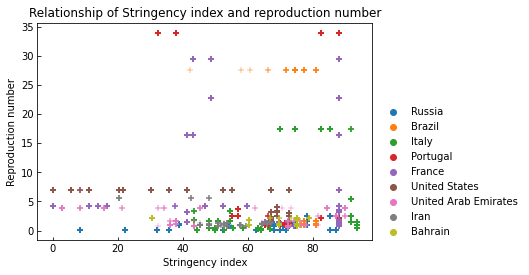

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()